<a href="https://colab.research.google.com/github/MithilaMarapareddy/Module3/blob/master/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/movies.csv")

In [ ]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df['genres'].value_counts()

Drama                                5315
Comedy                               2964
Documentary                          2427
Comedy|Drama                         1457
Drama|Romance                        1278
                                     ... 
Adventure|Children|War                  1
Adventure|Drama|Fantasy|IMAX            1
Action|Comedy|Crime|Drama|War           1
Adventure|Fantasy|Mystery               1
Action|Adventure|Thriller|Western       1
Name: genres, Length: 1446, dtype: int64

In [ ]:
#Action = "red,orange,blue"
#Animation="violet,pink,blue,orange,yellow"
#Children's="yellow,blue,pink"
#Comedy="yellow,orange"
#Crime="red,black,violet"
#Documentary="orange,yellow,green,blue,brown"
#Drama="blue,pink,white,red"
#Fantasy="purple"
#Film-Noir="orange,blue,black"
#Horror="black,red,green"
#Adventure ="orange,blue"
#Musical="green,blue,purple,cyan"
#Mystery="indigo,black,purple,cyan"
#Romance="red,pink,green,black"
#Sci-Fi="orange,indigo"
#Thriller="red,black"
#War="yellow,orange,red,blue,black"
#Western="orange,yellow"

In [ ]:
df['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Comedy|Romance|Sci-Fi|Thriller',
       'Action|Animation|Romance', 'Action|Adventure|Thriller|Western'],
      dtype=object)

In [ ]:
conditions = [
    (df['genres'] == "Animation"),
    (df['genres'] == "Action"),
    (df['genres'] == "Adventure"),
    (df['genres'] == "Children's"),
    (df['genres'] == "Comedy"),
    (df['genres'] == "Crime"),
    (df['genres'] == "Documentary"),
    (df['genres'] == "Drama"),
    (df['genres'] == "Fantasy"),
    (df['genres'] == "Film-Noir"),
    (df['genres'] == "Horror"),
    (df['genres'] == "Musical"),
    (df['genres'] == "Mystery"),
    (df['genres'] == "Romance"),
    (df['genres'] == "Sci-Fi"),
    (df['genres'] == "Thriller"),
    (df['genres'] == "War"),
    (df['genres'] == "Western"),
    (df['genres'] == "Animation|Children's|Comedy"),
    (df['genres'] == "Adventure|Children's|Fantasy"),
    (df['genres'] == "Comedy|Romance"),
    (df['genres'] == "Comedy|Drama"),
    (df['genres'] == "Action|Crime|Thriller"),
    (df['genres'] == "Adventure|Children's"),
    (df['genres'] == "Action|Adventure|Thriller"),
    (df['genres'] == "Comedy|Drama|Romance"),
    (df['genres'] == "Comedy|Horror"),
    (df['genres'] == "Animation|Children's"),
    (df['genres'] == "Action|Adventure|Romance"),
    (df['genres'] == "Drama|Thriller"),
    (df['genres'] == "Drama|Romance"),
    (df['genres'] == "Action|Comedy|Drama"),
    (df['genres'] == "Crime|Drama|Thriller"),
    (df['genres'] == "Drama|Sci-Fi"),
    (df['genres'] == "Adventure|Sci-Fi"),
    (df['genres'] == "Adventure|Romance"),
    (df['genres'] == "Children's|Comedy|Drama"),
    (df['genres'] == "Drama|War"),
    (df['genres'] == "Action|Crime|Drama"),
    (df['genres'] == "Action|Adventure"),
    (df['genres'] == "Crime|Thriller"),
    (df['genres'] == "Action|Children's|Musical|Romance"),
    (df['genres'] == "Action|Drama|War"),
    (df['genres'] == "Action|Adventure|Crime"),
    (df['genres'] == "Drama|Mystery|Romance"),
    (df['genres'] == "Action|Drama"),
    (df['genres'] == "Drama|Romance|War"),
    (df['genres'] == "Action|Adventure|Comedy|Crime"),
    (df['genres'] == "Comedy|War"),
    (df['genres'] == "Action|Adventure|Mystery|Sci-Fi"),
    (df['genres'] == "Drama|Thriller|War"),
    (df['genres'] == "Action|Romance|Thriller"),
    (df['genres'] == "Crime|Film-Noir|Mystery|Thriller"),
    (df['genres'] == "Action|Adventure|Drama|Romance"),
    (df['genres'] == "Adventure|Children's|Drama"),
    (df['genres'] == "Action|Sci-Fi|Thriller"),
    (df['genres'] == "Action|Adventure|Sci-Fi"),
    (df['genres'] == "Action|Children's"),
    (df['genres'] == "Horror|Sci-Fi"),
    (df['genres'] == "Action|Crime|Sci-Fi"),
    (df['genres'] == "Animation|Children's|Comedy|Romance"),
    (df['genres'] == "Children's|Drama"),
    (df['genres'] == "Crime|Drama"),
    (df['genres'] == "Drama|Fantasy|Romance|Thriller"),
    (df['genres'] == "Drama|Horror"),
    (df['genres'] == "Comedy|Sci-Fi"),
    (df['genres'] == "Mystery|Thriller"),
    (df['genres'] == "Adventure|Children's|Comedy|Fantasy|Romance"),
    (df['genres'] == "Action|Adventure|Fantasy|Sci-Fi"),
    (df['genres'] == "Drama|Romance|War|Western"),
    (df['genres'] == "Action|Crime"),
    (df['genres'] == "Crime|Drama|Romance|Thriller"),
    (df['genres'] == "Action|Adventure|Western"),
    (df['genres'] == "Horror|Thriller"),(df['genres'] == "Children's|Comedy|Fantasy"),
    (df['genres'] == "Action|Comedy|Musical|Sci-Fi"),    
    (df['genres'] == "Film-Noir|Thriller"),
    (df['genres'] == "Drama|Mystery|Thriller"),
    (df['genres'] == "Comedy|Romance|War"),
    (df['genres'] == "Action|Comedy"),
    (df['genres'] == "Adventure|Children's|Romance"),     
    (df['genres'] == "Animation|Children's|Musical"),
    (df['genres'] == "Comedy|Crime|Fantasy"),
   (df['genres'] == "Action|Comedy|Western"),(df['genres'] == "Action|Sci-Fi"),     
   (df['genres'] == "Action|Adventure|Comedy|Romance"),(df['genres'] == "Comedy|Crime|Drama"),
    (df['genres'] == "Comedy|Thriller"),
    (df['genres'] == "Horror|Sci-Fi|Thriller"),     
    (df['genres'] == "Mystery|Romance|Thriller"),(df['genres'] == "Comedy|Western"),
   (df['genres'] == "Drama|Western"),
   (df['genres'] == "Action|Adventure|Crime|Thriller"),     
   (df['genres'] == "Action|Comedy|War"),(df['genres'] == "Comedy|Mystery"),
   (df['genres'] == "Comedy|Mystery|Romance"),
   (df['genres'] == "Comedy|Drama|War"),     
   (df['genres'] == "Action|Drama|Mystery"),(df['genres'] == "Comedy|Crime|Horror"),
    (df['genres'] == "Film-Noir|Sci-Fi"),
    (df['genres'] == "Comedy|Romance|Thriller"),     
    (df['genres'] == "Action|Adventure|Children's|Sci-Fi"),
    (df['genres'] == "Children's|Comedy|Musical"),
    (df['genres'] == "Action|Adventure|Comedy"),
    (df['genres'] == "Action|Crime|Romance"),     
    (df['genres'] == "Action|Adventure|Animation|Children's|Fantasy"),(df['genres'] == "Animation|Children's|Comedy|Musical"),
    (df['genres'] == "Adventure|Drama|Western"),(df['genres'] == "Action|Adventure|Crime|Drama"),    
     (df['genres'] == "Action|Adventure|Animation|Horror|Sci-Fi"),(df['genres'] == "Action|Horror|Sci-Fi"),
    (df['genres'] == "Action|Adventure|Mystery"),(df['genres'] == "Action|Adventure|Fantasy"),     
    (df['genres'] == "Adventure|Animation|Children's|Comedy|Fantasy"),(df['genres'] == "Documentary|Drama"),
    (df['genres'] == "Action|Adventure|Comedy|War"),(df['genres'] == "Crime|Film-Noir|Thriller"),     
    (df['genres'] == "Action|Adventure|Romance|Thriller"),(df['genres'] == "Animation|Sci-Fi"),
 (df['genres'] == "Animation|Comedy|Thriller"),(df['genres'] == "Sci-Fi|War"),     
 (df['genres'] == "Comedy|Crime"),(df['genres'] == "Action|Sci-Fi|War"),
  (df['genres'] == "Comedy|Fantasy|Romance|Sci-Fi"),
  (df['genres'] == "Action|Mystery|Thriller"),     
  (df['genres'] == "Comedy|Musical"),(df['genres'] == "Action|Adventure|Sci-Fi|Thriller"),
  (df['genres'] == "Children's|Drama|Fantasy"),
  (df['genres'] == "Adventure|War"),     
  (df['genres'] == "Musical|Romance"),(df['genres'] == "Comedy|Musical|Romance"),
    (df['genres'] == "Comedy|Mystery|Romance|Thriller"),
    (df['genres'] == "Film-Noir|Mystery"),     
    (df['genres'] == "Adventure|Children's|Drama|Musical"),(df['genres'] == "Drama|Mystery|Sci-Fi|Thriller"),
  (df['genres'] == "Romance|Thriller"),
  (df['genres'] == "Film-Noir|Romance|Thriller"),     
  (df['genres'] == "Crime|Film-Noir|Mystery"),(df['genres'] == "Adventure|Comedy"),
  (df['genres'] == "Action|Adventure|Romance|War"),
  (df['genres'] == "Romance|War"),
  (df['genres'] == "Action|Drama|Western"),
    (df['genres'] =="Children's|Comedy|Western"),
    (df['genres'] == "Adventure|Children's|Comedy"),
    (df['genres'] == "Children's|Comedy|Mystery"),
    (df['genres'] == "Adventure|Children's|Fantasy|Sci-Fi"),
    (df['genres'] == "Adventure|Animation|Children's|Musical"),
    (df['genres'] == "Adventure|Children's|Musical"),
    (df['genres'] == "Crime|Film-Noir"),
    (df['genres'] == "Adventure|Children's|Comedy|Fantasy"),
    (df['genres'] == "Children's|Drama|Fantasy|Sci-Fi"),
    (df['genres'] == "Action|Romance"), 
    (df['genres'] == "Adventure|Western"), 
    (df['genres'] == "Comedy|Fantasy"), 
    (df['genres'] == "Animation|Comedy"), 
    (df['genres'] == "Crime|Drama|Film-Noir"), 
    (df['genres'] == "Action|Adventure|Drama|Sci-Fi|War"), 
    (df['genres'] == "Action|Sci-Fi|Thriller|War"), 
    (df['genres'] == "Action|Western"), 
    (df['genres'] == "Action|Animation|Children's|Sci-Fi|Thriller|War"), 
    (df['genres'] == "Action|Adventure|Romance|Sci-Fi|War"),
     (df['genres'] == "Action|Horror|Sci-Fi|Thriller"), 
    (df['genres'] == "Action|Adventure|Comedy|Horror|Sci-Fi"), 
    (df['genres'] == "Action|Comedy|Musical"), 
    (df['genres'] == "Mystery|Sci-Fi"), 
    (df['genres'] == "Film-Noir|Mystery|Thriller"), 
    (df['genres'] == "Adventure|Comedy|Drama"), 
    (df['genres'] == "Action|Adventure|Comedy|Horror"), 
    (df['genres'] == "Action|Drama|Mystery|Romance|Thriller"), 
    (df['genres'] == "Comedy|Mystery|Thriller"), 
    (df['genres'] == "Adventure|Animation|Sci-Fi|Thriller"), 
    (df['genres'] == "Action|Drama|Romance"), 
    (df['genres'] == "Action|Adventure|Drama"), 
    (df['genres'] == "Comedy|Drama|Musical"), 
    (df['genres'] == "Documentary|War"), 
    (df['genres'] == "Drama|Musical|War"), 
    (df['genres'] == "Action|Horror"), 
    (df['genres'] == "Horror|Romance"), 
    (df['genres'] == "Action|Comedy|Sci-Fi|War"), 
    (df['genres'] == "Crime|Drama|Sci-Fi"), 
    (df['genres'] == "Action|Romance|War"),
     (df['genres'] == "Action|Comedy|Crime|Drama"), 
    (df['genres'] == "Action|Drama|Thriller|War"), 
    (df['genres'] == "Action|Adventure|Children's"), 
    (df['genres'] == "Action|Adventure|Children's|Fantasy"), 
    (df['genres'] == "Adventure|Animation|Children's|Comedy|Musical"), 
    (df['genres'] == "Crime|Drama|Mystery"), 
    (df['genres'] == "Action|Adventure|Comedy|Sci-Fi"), 
    (df['genres'] == "Children's|Fantasy"), 
    (df['genres'] == "Action|Mystery|Sci-Fi|Thriller"), 
    (df['genres'] == "Action|Mystery|Romance|Thriller"),
    (df['genres'] == "Adventure|Thriller"), 
    (df['genres'] == "Action|Thriller|War"), 
    (df['genres'] == "Action|Crime|Mystery"), 
    (df['genres'] == "Horror|Mystery|Thriller"), 
    (df['genres'] == "Crime|Horror|Mystery|Thriller"), 
    (df['genres'] == "Comedy|Drama|Thriller"), 
    (df['genres'] == "Drama|Sci-Fi|Thriller"), 
    (df['genres'] == "Drama|Romance|Thriller"), 
    (df['genres'] == "Action|Adventure|Sci-Fi|War"), 
    (df['genres'] == "Comedy|Crime|Drama|Mystery"),
     (df['genres'] == "Comedy|Crime|Mystery|Thriller"),
    (df['genres'] == "Film-Noir|Sci-Fi|Thriller"), 
    (df['genres'] == "Adventure|Sci-Fi|Thriller"), 
    (df['genres'] == "Crime|Drama|Mystery|Thriller"), 
    (df['genres'] == "Comedy|Documentary"),
    (df['genres'] == "Documentary|Musical"), 
    (df['genres'] == "Action|Drama|Sci-Fi|Thriller"), 
    (df['genres'] == "Adventure|Animation|Children's|Fantasy"), 
    (df['genres'] == "Adventure|Comedy|Romance"), 
    (df['genres'] == "Mystery|Sci-Fi|Thriller"), 
    (df['genres'] == "Action|Comedy|Crime"), 
    (df['genres'] == "Animation|Children's|Fantasy|War"), 
    (df['genres'] == "Action|Crime|Drama|Thriller"), 
    (df['genres'] == "Comedy|Sci-Fi|Western"), 
    (df['genres'] == "Children's|Fantasy|Musical"), 
    (df['genres'] == "Fantasy|Sci-Fi"), 
    (df['genres'] == "Children's|Comedy|Sci-Fi"), 
    (df['genres'] == "Action|Adventure|Children's|Comedy"), 
    (df['genres'] == "Adventure|Children's|Drama|Romance"), 
    (df['genres'] == "Adventure|Children's|Sci-Fi") ,
    (df['genres'] == "Adventure|Children's|Comedy|Fantasy|Sci-Fi"),
    (df['genres'] =="Animation|Children's|Comedy|Musical|Romance"),
    (df['genres'] == "Children's|Musical"),
    (df['genres'] == "Drama|Fantasy"),
    (df['genres'] == "Animation|Children's|Fantasy|Musical"),
    (df['genres'] == "Adventure|Comedy|Musical"),
    (df['genres'] == "Children's|Sci-Fi"),
    (df['genres'] == "Children's|Horror"),
    (df['genres'] == "Comedy|Fantasy|Romance"),
    (df['genres'] == "Comedy|Crime|Thriller"),
    (df['genres'] == "Adventure|Animation|Children's|Sci-Fi"),
    (df['genres'] == "Action|Crime|Mystery|Thriller"),
    (df['genres'] == "Adventure|Musical"),
    (df['genres'] == "Animation|Children's|Drama|Fantasy"),
    (df['genres'] == "Children's|Fantasy|Sci-Fi"),
    (df['genres'] == "Adventure|Fantasy|Romance"),
    (df['genres'] == "Crime|Horror"),
    (df['genres'] == "Action|Adventure|Horror"),
    (df['genres'] == "Adventure|Fantasy|Sci-Fi"),
    (df['genres'] == "Drama|Film-Noir|Thriller"),
    (df['genres'] == "Action|Comedy|Fantasy"),
    (df['genres'] == "Sci-Fi|Thriller|War"),
    (df['genres'] == "Action|Adventure|Sci-Fi|Thriller|War"),
    (df['genres'] == "Action|Adventure|Drama|Thriller"),
    (df['genres'] == "Crime|Horror|Thriller"),
    (df['genres'] == "Animation|Musical"),
    (df['genres'] == "Action|War"),
    (df['genres'] == "Action|Comedy|Romance|Thriller"),
    (df['genres'] == "Comedy|Horror|Thriller"),
    (df['genres'] == "Drama|Horror|Thriller"),
    (df['genres'] == "Action|Sci-Fi|Thriller|Western"),
    (df['genres'] == "Drama|Romance|Sci-Fi"),
    (df['genres'] == "Action|Adventure|Horror|Thriller"),
    (df['genres'] == "Comedy|Film-Noir|Thriller"),
    (df['genres'] == "Comedy|Horror|Musical|Sci-Fi"),
    (df['genres'] == "Comedy|Romance|Sci-Fi"),
    (df['genres'] == "Action|Comedy|Sci-Fi|Thriller"),
    (df['genres'] == "Action|Sci-Fi|Western"),
    (df['genres'] == "Comedy|Horror|Musical"),
    (df['genres'] == "Crime|Mystery"),
    (df['genres'] == "Animation|Mystery"),
    (df['genres'] == "Action|Horror|Thriller"),
    (df['genres'] == "Action|Drama|Fantasy|Romance"),
    (df['genres'] == "Horror|Mystery"),
    (df['genres'] == "Adventure|Animation|Children's"),
    (df['genres'] == "Musical|Romance|War"),
    (df['genres'] == "Adventure|Drama|Romance"),
    (df['genres'] == "Adventure|Animation|Film-Noir"),
    (df['genres'] == "Action|Adventure|Animation"),
    (df['genres'] == "Comedy|Drama|Western"),
    (df['genres'] == "Adventure|Comedy|Sci-Fi"),
    (df['genres'] == "Drama|Romance|Western"),
    (df['genres'] == "Comedy|Drama|Sci-Fi"),
    (df['genres'] == "Action|Drama|Romance|Thriller"),
    (df['genres'] == "Adventure|Romance|Sci-Fi"),
    (df['genres'] == "Film-Noir|Horror"),
    (df['genres'] == "Crime|Drama|Film-Noir|Thriller"),
    (df['genres'] == "Action|Adventure|War"),
    (df['genres'] == "Romance|Western"),
    (df['genres'] == "Action|Children's|Fantasy"),
    (df['genres'] == "Adventure|Drama|Thriller"),
    (df['genres'] == "Adventure|Fantasy"),
    (df['genres'] == "Musical|War"),
    (df['genres'] == "Adventure|Musical|Romance"),
    (df['genres'] == "Action|Romance|Sci-Fi"),
    (df['genres'] == "Drama|Film-Noir"),
    (df['genres'] == "Comedy|Horror|Sci-Fi"),
    (df['genres'] == "Adventure|Drama|Romance|Sci-Fi"),
    (df['genres'] == "Adventure|Animation|Sci-Fi"),
    (df['genres'] == "Adventure|Crime|Sci-Fi|Thriller")
    ]
    
# create a list of the values we want to assign for each condition
values = ['violet,pink,blue,orange,yellow','red,orange,blue','orange,blue','yellow,blue,pink','yellow,orange',
          'red,black,violet','orange,yellow,green,blue,brown','blue,pink,white,red','purple','orange,blue,black',
          'black,red,green','green,blue,purple,cyan','indigo,black,purple,cyan','red,pink,green,black',
          'orange,indigo','red,black','yellow,orange,red,blue,black','orange,yellow','violet,pink,blue,orange,yellow', 'orange,blue,pink,yellow,purple','red,pink,green,black,yellow,orange',
          'red,orange,blue,pink,yellow,white','red,orange,blue,violet,yellow,black','orange,blue,pink,yellow','red,orange,blue,black',
          'red,orange,blue,pink,yellow,black,green,white','red,orange,yellow,black,green','orange,blue,violet,pink,yellow','red,orange,blue,pink,black,green',
          'blue,pink,white,red,black','blue,pink,white,red,green,black','red,blue,orange,pink,yellow,white','red,blue,pink,black,white,violet','red,orange,blue,pink,white,indigo','orange,blue,indigo','red,orange,blue,pink,black,green',
          'red,orange,blue,pink,yellow,white','red,blue,orange,pink,yellow,black,white','red,orange,blue,violet,pink,black,white','red,orange,blue','red,black,violet','red,orange,blue,yellow,pink,green,purple,cyan,black',
          'red,orange,blue,pink,yellow,black,white','red,orange,blue,violet,black','blue,pink,white,red,indigo,black,purple,cyan,green','red,orange,blue,pink,white','yellow,orange,red,blue,black,pink,white','red,orange,blue,yellow',
          'yellow,orange,red,blue,black','red,orange,blue,indigo,black,purple,cyan','blue,pink,white,red,black,yellow,orange','red,pink,green,black,orange,blue',
          'red,black,violet,orange,blue,indigo,purple,cyan','red,orange,blue,pink,white,green,black','orange,blue,yellow,pink,white,red','red,orange,blue,indigo,black','red,orange,blue,indigo','red,orange,blue,yellow,pink','black,red,green,orange,indigo','red,orange,blue,black,violet,indigo','violet,pink,blue,orange,yellow,red,green,black',
          'yellow,pink,blue,white,red','red,black,violet,blue,pink,white','blue,pink,white,red,purple,green,black','blue,pink,white,red,black,green','yellow,orange,indigo','indigo,black,purple,cyan,red',
          'red,pink,green,black,orange,blue,purple,yellow','red,orange,blue,purple,indigo','red,pink,green,black,blue,white,yellow,orange','red,orange,blue,black,violet','red,black,violet,blue,pink,white,green','red,orange,blue,yellow','red,black,green','yellow,blue,pink,orange,purple',
          'red,orange,blue,yellow,green,purple,cyan,indigo','red,black,orange,blue','blue,pink,white,red,indigo,black,purple,cyan','yellow,orange,red,pink,green,black,blue',
          'yellow,orange,red,blue','orange,blue,yellow,pink,red,green,black','violet,pink,blue,orange,yellow,green,purple,cyan','yellow,orange,red,black,violet,purple',
          'red,orange,blue,yellow,','red,orange,blue,indigo','red,orange,blue,yellow,pink,green,black','yellow,orange,red,black,violet,blue,pink,white',
          'yellow,orange,red,black','black,red,green,orange,indigo','indigo,black,purple,cyan,red,pink,green','orange,yellow',
          'blue,pink,white,red,orange,yellow','red,orange,blue,black,violet','red,orange,blue,yellow,black','orange,yellow,indigo,black,purple,cyan',
          'orange,yellow,indigo,black,purple,cyan,red,pink,green','yellow,orange,blue,pink,white,red','red,orange,blue,pink,white,red,indigo,black,purple,cyan','orange,yellow,red,black,violet,green',
          'orange,blue,black,orange,indigo','orange,yellow,red,black,green,pink','red,orange,blue,yellow,pink,indigo','yellow,blue,pink,orange,green,purple,cyan',
          'red,orange,blue,yellow','red,orange,blue,black,violet,pink,green','red,orange,blue,violet,pink,yellow,purple','violet,pink,blue,orange,yellow,green,purple,cyan',
          'orange,blue,pink,white,red,yellow','red,orange,blue,black,violet,pink,white','red,orange,blue,black,violet,pink,blue,yellow,green,indigo','red,orange,blue,black,green,indigo',
          'red,orange,blue,indigo,black,purple,cyan','red,orange,blue,purple','violet,pink,blue,orange,yellow,purple','orange,yellow,green,blue,brown,blue,pink,white,red',
          'red,orange,blue,yellow,black','red,black,violet,orange,blue','red,orange,blue,pink,green,black,','violet,pink,blue,orange,yellow,indigo',
          'violet,pink,blue,orange,yellow,red,black','yellow,orange,red,blue,black,indigo','orange,yellow,red,black,violet','red,orange,blue,indigo,yellow,black',
          'red,pink,green,black,orange,yellow,purple,indigo','red,orange,blue,indigo,black,purple,cyan','yellow,orange,green,blue,purple,cyan','red,orange,blue,indigo,black',
          'yellow,blue,pink,white,red,purple','orange,blue,yellow,red,blue,black','green,blue,purple,cyan,red,pink,green,black','orange,yellow,green,blue,purple,cyan,red,pink,green,black',
          'yellow,orange,indigo,black,purple,cyan,red,pink,green','orange,blue,indigo,black,purple,cyan','orange,blue,yellow,blue,pink,white,green,purple,cyan','blue,pink,white,red,indigo,black,purple,cyan,orange,',
          'red,pink,green,black','orange,blue,red,pink,green,black','red,black,violet,orange,blue,indigo,black,purple,cyan','orange,blue,yellow',
          'red,orange,blue,pink,green,black,yellow','red,pink,green,black,yellow,orange,blue',
          'red,orange,blue,pink,white,yellow',
        'yellow,blue,pink,orange',
       'orange,blue,yellow,pink',
       'yellow,blue,pink,orange,indigo,black,purple,cyan',
       'orange,blue,yellow,pink,purple,indigo',
       'orange,blue,violet,pink,yellow,green,purple,cyan',
       'orange,blue,yellow,pink,green,purple,cyan',
       'red,black,violet,orange,blue',
       'orange,blue,yellow,pink,purple',
       'yellow,blue,pink,white,red,purple,orange,indigo',
        'red,orange,blue,pink,green,black', 
       'orange,blue,yellow', 
       'yellow,orange,purple', 
       'violet,pink,blue,orange,yellow', 
       'red,black,violet,blue,pink,white,orange', 
       'red,orange,blue,pink,white,indigo,yellow,black', 
       'red,orange,blue,indigo,black,yellow,black', 
       'red,orange,blue,yellow', 
       'red,orange,blue,violet,pink,yellow,indigo,black', 
       'red,orange,blue,pink,green,black,indigo,yellow',
        'red,orange,blue,black,green,indigo', 
       'red,orange,blue,yellow,black,green,indigo', 
       'red,orange,blue,yellow,green,purple,cyan', 
       'indigo,black,purple,cyan,orange,indigo', 
       'orange,blue,black,indigo,purple,cyan,red', 
       'orange,blue,yellow,pink,white,red', 
       'red,orange,blue,yellow,black,green', 
       'red,orange,blue,pink,white,indigo,black,purple,cyan,green', 
       'yellow,orange,indigo,purple,cyan,red', 
       'orange,blue,violet,pink,yellow,indigo,red,black', 
       'red,orange,blue,pink,white,green,black', 
       'red,orange,blue,pink,white', 
       'yellow,orange,blue,pink,white,red,green,purple,cyan', 
       'orange,yellow,green,blue,brown,red,black', 
       'blue,pink,white,red,green,blue,purple,cyan,orange,yellow', 
       'red,orange,blue,black,green', 
       'black,red,green,pink', 
       'red,orange,blue,yellow,indigo,black', 
       'red,black,violet,blue,pink,white,red,orange,indigo', 
       'red,orange,blue,pink,green,black,yellow',
        'red,orange,blue,yellow,black,violet,pink,white', 
       'red,orange,blue,pink,white,black,yellow', 
       'red,orange,blue,yellow,pink', 
       'red,orange,blue,yellow,pink,purple', 
       'orange,blue,violet,pink,yellow,green,purple,cyan', 
        'red,black,violet,blue,pink,white,indigo,purple,cyan', 
        'red,orange,blue,yellow,indigo', 
        'yellow,blue,pink,purple', 
        'red,orange,blue,indigo,black,purple,cyan', 
        'red,orange,blue,indigo,black,purple,cyan,pink,green',
         'orange,blue,red,black', 
       'red,orange,blue,black,yellow', 
       'red,orange,blue,black,violet,indigo,purple,cyan', 
       'black,red,green,indigo,purple,cyan', 
       'red,black,violet,green,indigo,purple,cyan', 
       'yellow,orange,blue,pink,white,red', 
       'blue,pink,white,red,orange,indigo,black', 
       'blue,pink,white,red,green,black', 
       'red,orange,blue,indigo,yellow,black', 
       'yellow,orange,red,black,violet,blue,pink,white,indigo,purple,cyan',
       'yellow,orange,red,black,violet,indigo,purple,cyan',
        'orange,blue,black,indigo,red', 
       'orange,blue,indigo,red,black', 
       'red,black,violet,blue,pink,white,indigo,purple,cyan',
       'yellow,orange,green,black,brown',
       'yellow,orange,green,black,brown,blue,purple,cyan', 
       'red,orange,blue,pink,white,indigo,black', 
       'orange,blue,violet,pink,yellow,purple', 
       'orange,blue,yellow,red,pink,green,black', 
       'indigo,black,purple,cyan,orange,red', 
        'red,orange,blue,yellow,black,violet', 
        'violet,pink,blue,orange,yellow,purple,red,black', 
        'red,orange,blue,black,violet,pink,white', 
        'yellow,orange,indigo', 
        'yellow,blue,pink,purple,green,cyan', 
        'purple,orange,indigo', 
        'yellow,blue,pink,orange,indigo', 
        'red,orange,blue,yellow,pink', 
        'orange,blue,yellow,pink,white,red,green,black', 
        'orange,blue,yellow,pink,indigo',
        'orange,blue,yellow,pink,purple,indigo',
        'orange,blue,yellow,pink,violet,green,purple,cyan,red,black',
       'blue,yellow,pink,green,purple,cyan',
       'red,white,blue,pink,purple',
       'orange,blue,yellow,pink,violet,purple,green,cyan',
       'orange,blue,yellow,green,purple,cyan',
       'blue,yellow,pink,indigo,orange',
       'blue,yellow,pink,red,black,green',
       'orange,yellow,purple,red,green,black,pink',
       'orange,yellow,red,blue,violet,black',
       'orange,blue,yellow,pink,violet,indigo',
       'red,orange,blue,violet,indigo,black,purple,cyan',
       'orange,blue,green,purple,cyan',
       'orange,blue,yellow,pink,violet,red,white,purple',
       'blue,yellow,pink,purple,indigo,orange',
       'orange,blue,purple,red,green,black,pink',
       'red,blue,violet,black,green',
       'red,orange,blue,black,green',
       'orange,blue,purple,indigo',
       'red,white,blue,pink,orange,black',
       'red,orange,blue,yellow,purple',
       'indigo,orange,red,black,blue,yellow',
       'red,orange,blue,indigo,black,yellow',
       'red,orange,blue,white,pink,black',
       'red,blue,violet,black,green',
       'orange,blue,yellow,pink,violet,green,purple,cyan',
       'red,orange,blue,yellow,black',
       'red,orange,blue,yellow,green,black,pink',
       'orange,yellow,red,black,green',
       'red,white,blue,pink,black,green',
       'red,orange,blue,indigo,black,yellow',
       'red,white,blue,pink,green,black,indigo,orange',
       'red,orange,blue,black,green',
       'orange,yellow,blue,black,red',
       'orange,yellow,red,black,green,blue,purple,cyan,indigo',
       'orange,yellow,red,green,black,pink,indigo',
       'red,orange,blue,yellow,indigo,black',
       'red,orange,blue,indigo,yellow',
       'orange,yellow,red,black,green,blue,purple,cyan',
       'red,blue,indigo,black,purple,cyan,violet',
       'orange,blue,yellow,pink,indigo,black,purple,cyan,violet',
       'red,orange,blue,black,green',
       'red,orange,blue,white,pink,purple,green,black',
       'red,black,green,indigo,purple',
       'orange,blue,yellow,pink,violet',
        'green,blue,purple,cyan,red,black,pink,orange,yellow',
        'orange,blue,red,white,pink,green,black',
        'orange,blue,yellow,pink,violet,black',
        'red,orange,blue,yellow,pink,violet',
        'orange,yellow,red,white,blue,pink',
        'orange,blue,yellow,indigo',
       'red,white,blue,pink,green,black,orange,yellow',
       'orange,yellow,red,white,blue,pink,indigo,orange',
       'red,orange,blue,white,pink,green,black',
       'orange,blue,red,green,black,pink,indigo',
       'orange,blue,black,red,green',
       'red,blue,violet,white,pink,orange,black',
       'red,orange,blue,yellow,black',
       'red,green,black,pink,orange,yellow',
       'red,orange,blue,yellow,pink,purple',
       'orange,blue,red,white,pink,black',
       'orange,blue,purple',
       'green,blue,purple,cyan,red,orange,yellow,black',
       'orange,blue,green,purple,cyan,red,black,pink',
       'red,orange,blue,green,black,pink,indigo',
       'red,white,blue,pink,orange,black',
       'orange,yellow,red,black,green,indigo',
       'orange,blue,red,white,pink,green,black,pink,indigo',
       'orange,blue,yellow,pink,violet,indigo',
       'orange,blue,red,violet,indigo,black'
          ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['colour'] = np.select(conditions, values)

# display updated DataFrame
df

    

,movieId,title,genres,colour
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"red,orange,blue,pink,yellow,black,green,white"
4,5,Father of the Bride Part II (1995),Comedy,"yellow,orange"
...,...,...,...,...
34203,151697,Grand Slam (1967),Thriller,"red,black"
34204,151701,Bloodmoney (2010),(no genres listed),0
34205,151703,The Butterfly Circus (2009),Drama,"blue,pink,white,red"
34206,151709,Zero (2015),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo"


In [ ]:
print("Select one color from the set of given colors:")
print("1.RED \n"
      "2.ORANGE \n"
      "3.BLUE \n"
"4.VIOLET \n"
"5.PINK \n"
"6.YELLOW \n"
"7.BLACK \n"
"8.GREEN \n"
"9.BROWN \n"
"10.WHITE \n"
"11.PURPLE \n"
"12.CYAN \n"
"13.INDIGO")

Select one color from the set of given colors:
1.RED 
2.ORANGE 
3.BLUE 
4.VIOLET 
5.PINK 
6.YELLOW 
7.BLACK 
8.GREEN 
9.BROWN 
10.WHITE 
11.PURPLE 
12.CYAN 
13.INDIGO


In [ ]:
a=input()

indigo


In [ ]:
res = [i for i in values if a in i] 
res

['indigo,black,purple,cyan',
 'orange,indigo',
 'red,orange,blue,pink,white,indigo',
 'orange,blue,indigo',
 'blue,pink,white,red,indigo,black,purple,cyan,green',
 'red,orange,blue,indigo,black,purple,cyan',
 'red,black,violet,orange,blue,indigo,purple,cyan',
 'red,orange,blue,indigo,black',
 'red,orange,blue,indigo',
 'black,red,green,orange,indigo',
 'red,orange,blue,black,violet,indigo',
 'yellow,orange,indigo',
 'indigo,black,purple,cyan,red',
 'red,orange,blue,purple,indigo',
 'red,orange,blue,yellow,green,purple,cyan,indigo',
 'blue,pink,white,red,indigo,black,purple,cyan',
 'red,orange,blue,indigo',
 'black,red,green,orange,indigo',
 'indigo,black,purple,cyan,red,pink,green',
 'orange,yellow,indigo,black,purple,cyan',
 'orange,yellow,indigo,black,purple,cyan,red,pink,green',
 'red,orange,blue,pink,white,red,indigo,black,purple,cyan',
 'orange,blue,black,orange,indigo',
 'red,orange,blue,yellow,pink,indigo',
 'red,orange,blue,black,violet,pink,blue,yellow,green,indigo',
 'red,ora

In [ ]:
rslt_df= df[df['colour'].isin(res)]
rslt_df

,movieId,title,genres,colour
23,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo"
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,"indigo,black,purple,cyan,orange,red"
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"indigo,black,purple,cyan,red"
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,"red,orange,blue,indigo,black"
75,76,Screamers (1995),Action|Sci-Fi|Thriller,"red,orange,blue,indigo,black"
...,...,...,...,...
34161,151567,The War in Space (1977),Action|Adventure|Sci-Fi,"red,orange,blue,indigo"
34167,151591,The Wannabe (2015),Crime|Drama|Mystery|Thriller,"red,black,violet,blue,pink,white,indigo,purple..."
34194,151675,Lazer Team (2016),Comedy|Sci-Fi,"yellow,orange,indigo"
34202,151695,The Survivalist (2015),Drama|Sci-Fi|Thriller,"blue,pink,white,red,orange,indigo,black"


In [ ]:
df1=pd.read_csv("/ratings.csv")
df1

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
1048570,11331,1204,4.0,1090592013
1048571,11331,1207,4.0,1090591996
1048572,11331,1242,3.5,1090591972
1048573,11331,1266,3.5,1090592000


In [ ]:
merged = pd.merge(rslt_df, df1, on=['movieId'], how='inner')
merged

,movieId,title,genres,colour,userId,rating,timestamp
0,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",14,3.0,845470571
1,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",15,4.0,1153013415
2,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",17,3.0,944996768
3,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",68,4.0,1011097395
4,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",114,4.0,946312134
...,...,...,...,...,...,...,...
146234,149412,Legend of the Galactic Heroes: My Conquest Is ...,Animation|Sci-Fi,"violet,pink,blue,orange,yellow,indigo",9503,3.5,1451090736
146235,149530,Dick Tracy Meets Gruesome (1947),Action|Crime|Mystery|Thriller,"red,orange,blue,violet,indigo,black,purple,cyan",6262,2.0,1451275686
146236,149650,Childhood's End (2015),Drama|Sci-Fi|Thriller,"blue,pink,white,red,orange,indigo,black",1573,5.0,1451781754
146237,149650,Childhood's End (2015),Drama|Sci-Fi|Thriller,"blue,pink,white,red,orange,indigo,black",4208,2.0,1453013584


In [ ]:
merged.sort_values("colour")

,movieId,title,genres,colour,userId,rating,timestamp
109716,4833,"Changeling, The (1980)",Horror|Mystery|Thriller,"black,red,green,indigo,purple,cyan",10854,2.0,1357545187
63137,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,"black,red,green,indigo,purple,cyan",8988,4.0,996289341
63138,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,"black,red,green,indigo,purple,cyan",8996,3.0,1181138594
63139,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,"black,red,green,indigo,purple,cyan",9028,3.0,945189965
63140,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,"black,red,green,indigo,purple,cyan",9030,3.0,1422416335
...,...,...,...,...,...,...,...
78402,2413,Clue (1985),Comedy|Crime|Mystery|Thriller,"yellow,orange,red,black,violet,indigo,purple,cyan",4282,3.5,1098390674
130922,38061,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller,"yellow,orange,red,black,violet,indigo,purple,cyan",6775,4.0,1303742545
130923,38061,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller,"yellow,orange,red,black,violet,indigo,purple,cyan",6787,4.0,1225550497
130907,38061,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller,"yellow,orange,red,black,violet,indigo,purple,cyan",6155,3.5,1446497487


In [ ]:
merge_drop=merged.drop(['title','genres','colour','timestamp'], axis = 1)
merge_drop 

,movieId,userId,rating
0,24,14,3.0
1,24,15,4.0
2,24,17,3.0
3,24,68,4.0
4,24,114,4.0
...,...,...,...
146234,149412,9503,3.5
146235,149530,6262,2.0
146236,149650,1573,5.0
146237,149650,4208,2.0


In [ ]:
n_users=int(merge_drop.userId.nunique())
n_movies=int(merge_drop.movieId.nunique())

In [ ]:
print("n_users = ",n_users, "||", "n_movies = ", n_movies )

n_users =  9999 || n_movies =  1287


In [ ]:
ratings_matrix_items = merged.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items.shape

(1287, 9999)

**Recommending movies based on Collaborative Filtering technique**

In [ ]:
# Calculate cosine similarity between movies
from sklearn.metrics.pairwise import pairwise_distances
movie_similarity = 1 - pairwise_distances( ratings_matrix_items.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286
0,0.000000,0.190392,0.163068,0.091590,0.107181,0.073143,0.027596,0.105407,0.217911,0.118825,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.016730,0.000000
1,0.190392,0.000000,0.550621,0.146893,0.213179,0.107501,0.137991,0.158154,0.288462,0.165664,...,0.0,0.018259,0.000000,0.0,0.00000,0.000000,0.000000,0.018259,0.005813,0.018259
2,0.163068,0.550621,0.000000,0.074336,0.115433,0.075132,0.136377,0.166241,0.325552,0.185633,...,0.0,0.015577,0.018358,0.0,0.02077,0.012981,0.012981,0.015577,0.007714,0.015577
3,0.091590,0.146893,0.074336,0.000000,0.273147,0.130740,0.011060,0.025164,0.089956,0.050332,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.013326,0.000000
4,0.107181,0.213179,0.115433,0.273147,0.000000,0.140808,0.016773,0.079984,0.141160,0.108929,...,0.0,0.060084,0.000000,0.0,0.00000,0.000000,0.000000,0.060084,0.000000,0.060084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,0.000000,0.000000,0.012981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
1283,0.000000,0.000000,0.012981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
1284,0.000000,0.018259,0.015577,0.000000,0.060084,0.134244,0.000000,0.052930,0.000000,0.067719,...,0.0,1.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1285,0.016730,0.005813,0.007714,0.013326,0.000000,0.028490,0.017280,0.000000,0.014958,0.028743,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def item_similarity(title): 
    """
    recomendates similar movies
   :param data: name of the movie 
   """
    try:
        #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
        user_inp=title
        inp=df[df['title']==user_inp].index.tolist()
        inp=inp[0]

        df['similarity'] = ratings_matrix_items.iloc[inp]
        df.columns = ['movieId', 'title', 'tag','similarity']
    except:
        print("hello!")

In [ ]:
def recommendedMoviesAsperItemSimilarity(userId):
    """
     Recommending movie which user hasn't watched as per Item Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user_movie= merged[(merged.userId==userId) & merged.rating.isin([5,4])][['title']]
    user_movie=user_movie.iloc[0,0]
    item_similarity(user_movie)
    sorted_movies_as_per_userChoice=df.sort_values( ["similarity"], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0]['movieId']
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= df1[df1['userId']== userId]['movieId']
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                df_new= df1[(df1.movieId==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    return best10['movieId']

In [ ]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(df[df['movieId']==id]['title'])
    return movie_titles

In [ ]:
userId=50
print("Recommended movies,:\n",movieIdToTitle(recommendedMoviesAsperItemSimilarity(userId)))

hello!
Recommended movies,:
 [35    Dead Man Walking (1995)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object, 437    Dazed and Confused (1993)
Name: title, dtype: object]


In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Data Exploration

In [ ]:
merged

,movieId,title,genres,colour,userId,rating,timestamp
0,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",14,3.0,845470571
1,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",15,4.0,1153013415
2,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",17,3.0,944996768
3,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",68,4.0,1011097395
4,24,Powder (1995),Drama|Sci-Fi,"red,orange,blue,pink,white,indigo",114,4.0,946312134
...,...,...,...,...,...,...,...
146234,149412,Legend of the Galactic Heroes: My Conquest Is ...,Animation|Sci-Fi,"violet,pink,blue,orange,yellow,indigo",9503,3.5,1451090736
146235,149530,Dick Tracy Meets Gruesome (1947),Action|Crime|Mystery|Thriller,"red,orange,blue,violet,indigo,black,purple,cyan",6262,2.0,1451275686
146236,149650,Childhood's End (2015),Drama|Sci-Fi|Thriller,"blue,pink,white,red,orange,indigo,black",1573,5.0,1451781754
146237,149650,Childhood's End (2015),Drama|Sci-Fi|Thriller,"blue,pink,white,red,orange,indigo,black",4208,2.0,1453013584


In [ ]:
merged.describe()

,movieId,userId,rating,timestamp
count,146239.000000,146239.000000,146239.000000,1.462390e+05
mean,10786.888176,5697.880750,3.480340,1.137147e+09
std,24148.585418,3258.261981,1.087795,1.828981e+08
min,24.000000,2.000000,0.500000,8.250017e+08
25%,1127.000000,2921.000000,3.000000,9.782299e+08
50%,2021.000000,5695.000000,3.500000,1.121230e+09
75%,4813.000000,8545.000000,4.000000,1.282512e+09
max,150196.000000,11331.000000,5.000000,1.454049e+09


In [ ]:
ratings=pd.DataFrame(merged.groupby('title')['rating'].mean())
ratings['number_of_ratings']=merged.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",2.500000,1
"10th Victim, The (La decima vittima) (1965)",2.800000,5
12:01 PM (1990),3.500000,1
13 Beloved (13 game sayawng) (2006),3.666667,3
13B (2009),3.500000,1


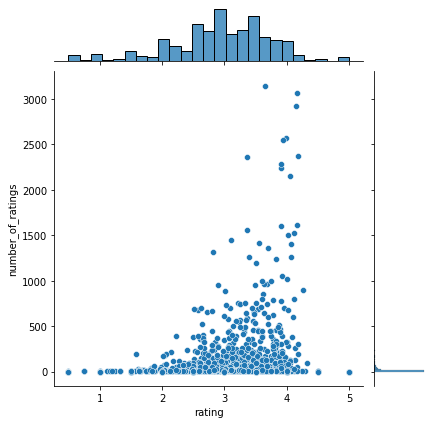

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating',y='number_of_ratings',data=ratings)

In [ ]:
movie_matrix=merged.pivot_table(index='userId',columns='title',values='rating')
movie_matrix

title,"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)","10th Victim, The (La decima vittima) (1965)",12:01 PM (1990),13 Beloved (13 game sayawng) (2006),13B (2009),1984 (1956),1984 (Nineteen Eighty-Four) (1984),20 Million Miles to Earth (1957),"20,000 Leagues Under the Sea (1916)",2009: Lost Memories (2002),...,Youth Without Youth (2007),Z (1969),Z for Zachariah (2015),Zapped Again! (1990),Zapped! (1982),Zardoz (1974),Zero Effect (1998),Zombie Apocalypse (2011),Zone Troopers (1985),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Jurassic Park (1993),3.657661,3146
Star Wars: Episode IV - A New Hope (1977),4.168243,3067
"Matrix, The (1999)",4.143468,2924
Star Wars: Episode VI - Return of the Jedi (1983),3.993587,2573
Terminator 2: Judgment Day (1991),3.946821,2548
Star Wars: Episode V - The Empire Strikes Back (1980),4.178134,2369
Independence Day (a.k.a. ID4) (1996),3.367343,2367
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.916447,2280
Back to the Future (1985),3.902232,2240


In [ ]:
ratings.sort_values('rating',ascending=False).head(10)

,rating,number_of_ratings
title,,
Flash Gordon (1936),5.0,1
Atragon (Kaitei Gunkan) (1963),5.0,1
Left Behind (2014),5.0,1
"Vault of Horror, The (1973)",5.0,1
Generation P (2011),5.0,1
Devil Girl From Mars (1954),5.0,1
Thorne: Sleepyhead (2010),5.0,1
Thorne: Scaredy Cat (2010),5.0,1
Doctor Who: The Runaway Bride (2007),5.0,1


Recommending movies using Deep Neural Networks

In [ ]:
#Extract the generes into seperate columns
genres = df.columns[4:].tolist()


In [ ]:
for genre in genres:
    merged[genre] = merged['genres'].str.contains(genre).astype(int)

In [ ]:
# Extract the features
X = merged[genres]
y = merged['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3656/3656 [==============================] - 16s 4ms/step - loss: 5.6281 - val_loss: 1.6832
Epoch 2/10
3656/3656 [==============================] - 14s 4ms/step - loss: 1.2578 - val_loss: 1.1930
Epoch 3/10
3656/3656 [==============================] - 15s 4ms/step - loss: 1.1810 - val_loss: 1.1929
Epoch 4/10
3656/3656 [==============================] - 15s 4ms/step - loss: 1.1810 - val_loss: 1.1929
Epoch 5/10
3656/3656 [==============================] - 15s 4ms/step - loss: 1.1810 - val_loss: 1.1930
Epoch 6/10
3656/3656 [==============================] - 15s 4ms/step - loss: 1.1810 - val_loss: 1.1929
Epoch 7/10
3656/3656 [==============================] - 15s 4ms/step - loss: 1.1809 - val_loss: 1.1931
Epoch 8/10
3656/3656 [==============================] - 14s 4ms/step - loss: 1.1810 - val_loss: 1.1929
Epoch 9/10
3656/3656 [==============================] - 14s 4ms/step - loss: 1.1810 - val_loss: 1.1929
Epoch 10/10
3656/3656 [==============================] - 15s 4ms/step - l

In [ ]:
user_id = 50

# Filter out watched movies
watched_movies = df1[df1['userId'] == user_id]['movieId'].tolist()
unwatched_movies = merged[~merged['movieId'].isin(watched_movies)]

In [ ]:
# Create test set
if len(unwatched_movies) > 0:
    test_set = pd.concat([pd.Series([user_id]*len(unwatched_movies)), unwatched_movies['movieId']], axis=1)
    test_set.columns = ['userId', 'movieId']


In [ ]:
 # Sort movies by predicted rating and return top N recommendations
top_recommendations = unwatched_movies.sort_values(by='rating', ascending=False)[:10]
print(top_recommendations['title'])


49788              Back to the Future (1985)
111467    Witness for the Prosecution (1957)
27263                     Heavy Metal (1981)
111474    Witness for the Prosecution (1957)
111471    Witness for the Prosecution (1957)
27244                     Heavy Metal (1981)
27237                     Heavy Metal (1981)
27236                     Heavy Metal (1981)
111468    Witness for the Prosecution (1957)
27234                     Heavy Metal (1981)
Name: title, dtype: object


In [ ]:
# Evaluate the model on the test set
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('Mean squared error: {:.2f}'.format(mse))
print('Mean absolute error: {:.2f}'.format(mae))

Mean squared error: 1.19
Mean absolute error: 0.88
